In [151]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [152]:
def split_name_text(text_data):

    # Initialise a list
    entries = []

    # Extract the name and text part from each line
    for line in text_data:
        parts = line.split('/')
        if len(parts) >= 3:
            name = parts[2]
            entries.append(name)
    

    entries_df = pd.DataFrame(entries, columns=['Names'])

    entries = entries_df['Names'].tolist()

    # Return list
    return entries

In [153]:
def drop_duplicates(text_data):
    text_data_df = pd.DataFrame(text_data, columns=['Names'])
    text_data_df.drop_duplicates(inplace=True)
    text_data = text_data_df['Names'].tolist()

    return text_data

In [154]:
def average_wc(name, text_data):
    sum = 0
    count = 0
    average = 0

    for line in text_data:
        parts = line.split()
        text_num = parts[0]
        parts = line.split('/')
        if len(parts) >= 3:
            text_name = parts[2]

            if name == text_name:
                sum += int(text_num)
                count += 1

    average = round(sum/count)

    return average

In [155]:
text_files = ['./word_counts_2000.text', './word_counts_2001.text', './word_counts_2002.text']
all_wc = []
for text_file in text_files:
    year_array = []
    with open(text_file, 'r') as file:
        text_data = file.readlines()

        name_text = split_name_text(text_data)
        name_text = drop_duplicates(name_text)

        file_name = os.path.basename(text_file)
        array_name = os.path.splitext(file_name)[0]

        for name in name_text:
            avg_wc = average_wc(name, text_data)
            entry = {'Name:': name, 'Word Count': avg_wc}
            year_array.append(entry)
            dict_entry = {'Year': array_name, 'Name': name, 'WC': avg_wc}
            all_wc.append(dict_entry)
        
print(all_wc)



[{'Year': 'word_counts_2000', 'Name': 'allen-p', 'WC': 172}, {'Year': 'word_counts_2000', 'Name': 'arnold-j', 'WC': 199}, {'Year': 'word_counts_2000', 'Name': 'arora-h', 'WC': 199}, {'Year': 'word_counts_2000', 'Name': 'badeer-r', 'WC': 321}, {'Year': 'word_counts_2000', 'Name': 'bailey-s', 'WC': 153}, {'Year': 'word_counts_2000', 'Name': 'bass-e', 'WC': 335}, {'Year': 'word_counts_2000', 'Name': 'baughman-d', 'WC': 349}, {'Year': 'word_counts_2000', 'Name': 'beck-s', 'WC': 285}, {'Year': 'word_counts_2000', 'Name': 'brawner-s', 'WC': 165}, {'Year': 'word_counts_2000', 'Name': 'buy-r', 'WC': 203}, {'Year': 'word_counts_2000', 'Name': 'campbell-l', 'WC': 268}, {'Year': 'word_counts_2000', 'Name': 'carson-m', 'WC': 111}, {'Year': 'word_counts_2000', 'Name': 'cash-m', 'WC': 301}, {'Year': 'word_counts_2000', 'Name': 'corman-s', 'WC': 335}, {'Year': 'word_counts_2000', 'Name': 'cuilla-m', 'WC': 205}, {'Year': 'word_counts_2000', 'Name': 'dasovich-j', 'WC': 449}, {'Year': 'word_counts_2000'

In [156]:
df = pd.DataFrame(all_wc)
df['Year'] = df['Year'].str.replace('word_counts_', '')
df.notnull()
print(df)

     Year             Name    WC
0    2000          allen-p   172
1    2000         arnold-j   199
2    2000          arora-h   199
3    2000         badeer-r   321
4    2000         bailey-s   153
5    2000           bass-e   335
6    2000       baughman-d   349
7    2000           beck-s   285
8    2000        brawner-s   165
9    2000            buy-r   203
10   2000       campbell-l   268
11   2000         carson-m   111
12   2000           cash-m   301
13   2000         corman-s   335
14   2000         cuilla-m   205
15   2000       dasovich-j   449
16   2000          davis-d   271
17   2000           dean-c  1086
18   2000       delainey-d   282
19   2000        derrick-j   351
20   2000        donohoe-t   359
21   2000        dorland-c   105
22   2000          ermis-f   460
23   2000         farmer-d   209
24   2000         fossum-d   343
25   2000            gay-r   235
26   2000        germany-c   192
27   2000   gilbertsmith-d   236
28   2000          giron-d   227
29   2000 

In [157]:
pivot_df = df.pivot_table(index='Name', columns='Year', values='WC')
#pivot_df = pivot_df.round().astype('Int64')
pivot_df = pivot_df.dropna()

print(pivot_df)

Year               2000   2001    2002
Name                                  
allen-p           172.0  245.0   138.0
arnold-j          199.0  374.0   162.0
arora-h           199.0  398.0   143.0
badeer-r          321.0   40.0   256.0
bailey-s          153.0  253.0   221.0
bass-e            335.0  337.0   426.0
baughman-d        349.0  364.0   506.0
beck-s            285.0  303.0   338.0
brawner-s         165.0  365.0   332.0
buy-r             203.0  253.0   321.0
campbell-l        268.0  354.0   197.0
carson-m          111.0  536.0   313.0
cash-m            301.0  398.0   841.0
corman-s          335.0  386.0   318.0
cuilla-m          205.0  661.0  2863.0
dasovich-j        449.0  781.0   432.0
dean-c           1086.0  391.0   205.0
delainey-d        282.0  277.0   145.0
dorland-c         105.0  263.0   516.0
ermis-f           460.0  511.0  1560.0
farmer-d          209.0  221.0   338.0
germany-c         192.0  254.0   307.0
gilbertsmith-d    236.0  257.0   295.0
giron-d           227.0  

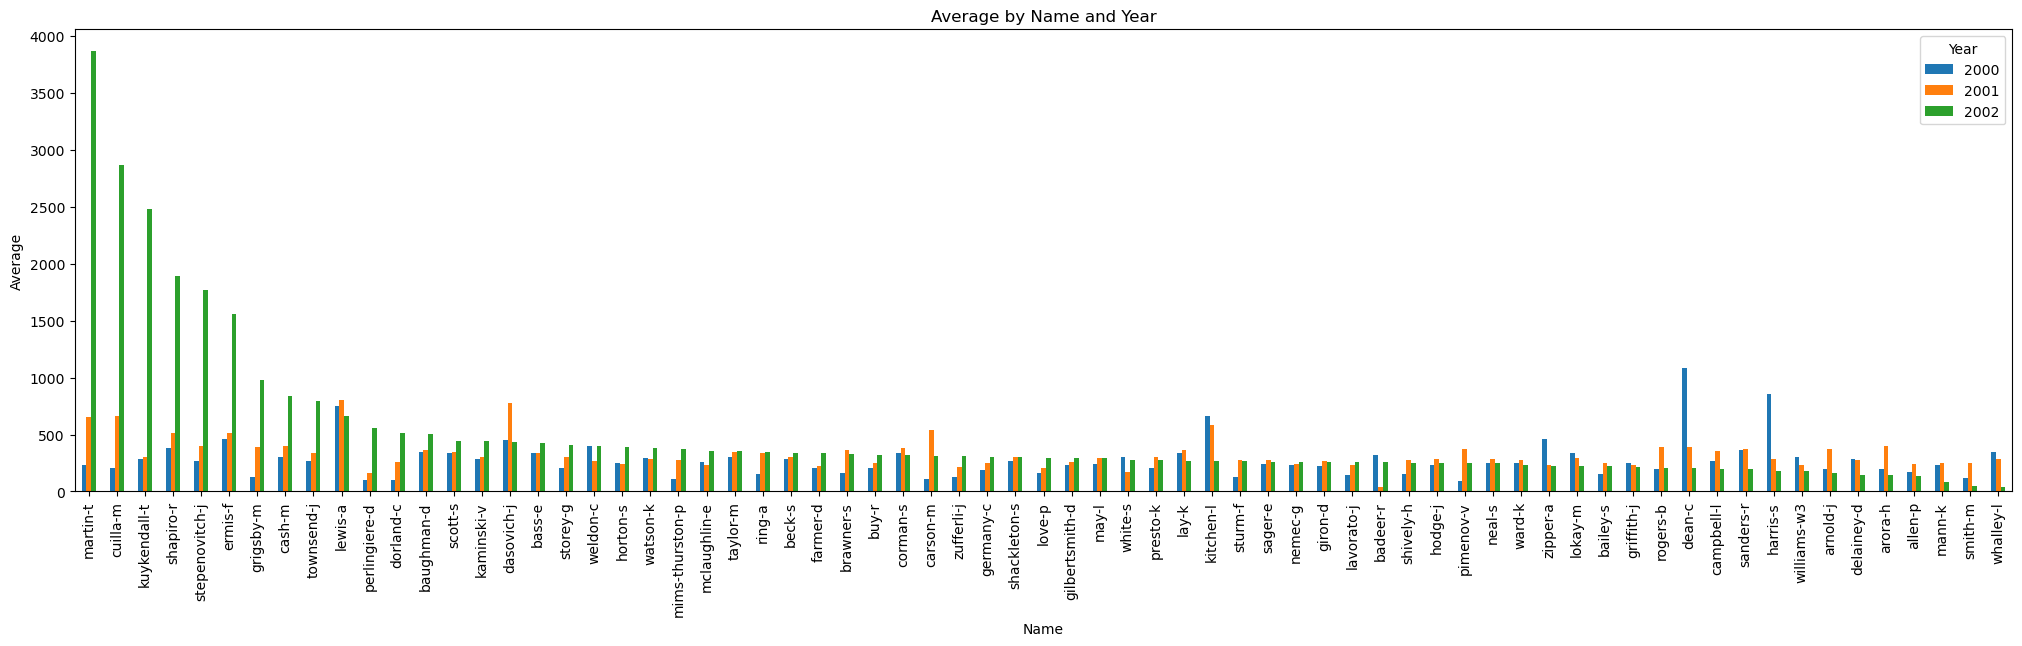

In [158]:
pivot_df_sorted = pivot_df.sort_values(by='2002', ascending=False)

pivot_df_sorted.plot(kind='bar', figsize=(25, 6))
plt.xlabel('Name')
plt.ylabel('Average')
plt.title('Average by Name and Year')
plt.legend(title='Year')
plt.show()

In [159]:
pivot_df['difference_01_02'] = pivot_df['2002']-pivot_df['2001']

print(pivot_df)

Year               2000   2001    2002  difference_01_02
Name                                                    
allen-p           172.0  245.0   138.0            -107.0
arnold-j          199.0  374.0   162.0            -212.0
arora-h           199.0  398.0   143.0            -255.0
badeer-r          321.0   40.0   256.0             216.0
bailey-s          153.0  253.0   221.0             -32.0
bass-e            335.0  337.0   426.0              89.0
baughman-d        349.0  364.0   506.0             142.0
beck-s            285.0  303.0   338.0              35.0
brawner-s         165.0  365.0   332.0             -33.0
buy-r             203.0  253.0   321.0              68.0
campbell-l        268.0  354.0   197.0            -157.0
carson-m          111.0  536.0   313.0            -223.0
cash-m            301.0  398.0   841.0             443.0
corman-s          335.0  386.0   318.0             -68.0
cuilla-m          205.0  661.0  2863.0            2202.0
dasovich-j        449.0  781.0 

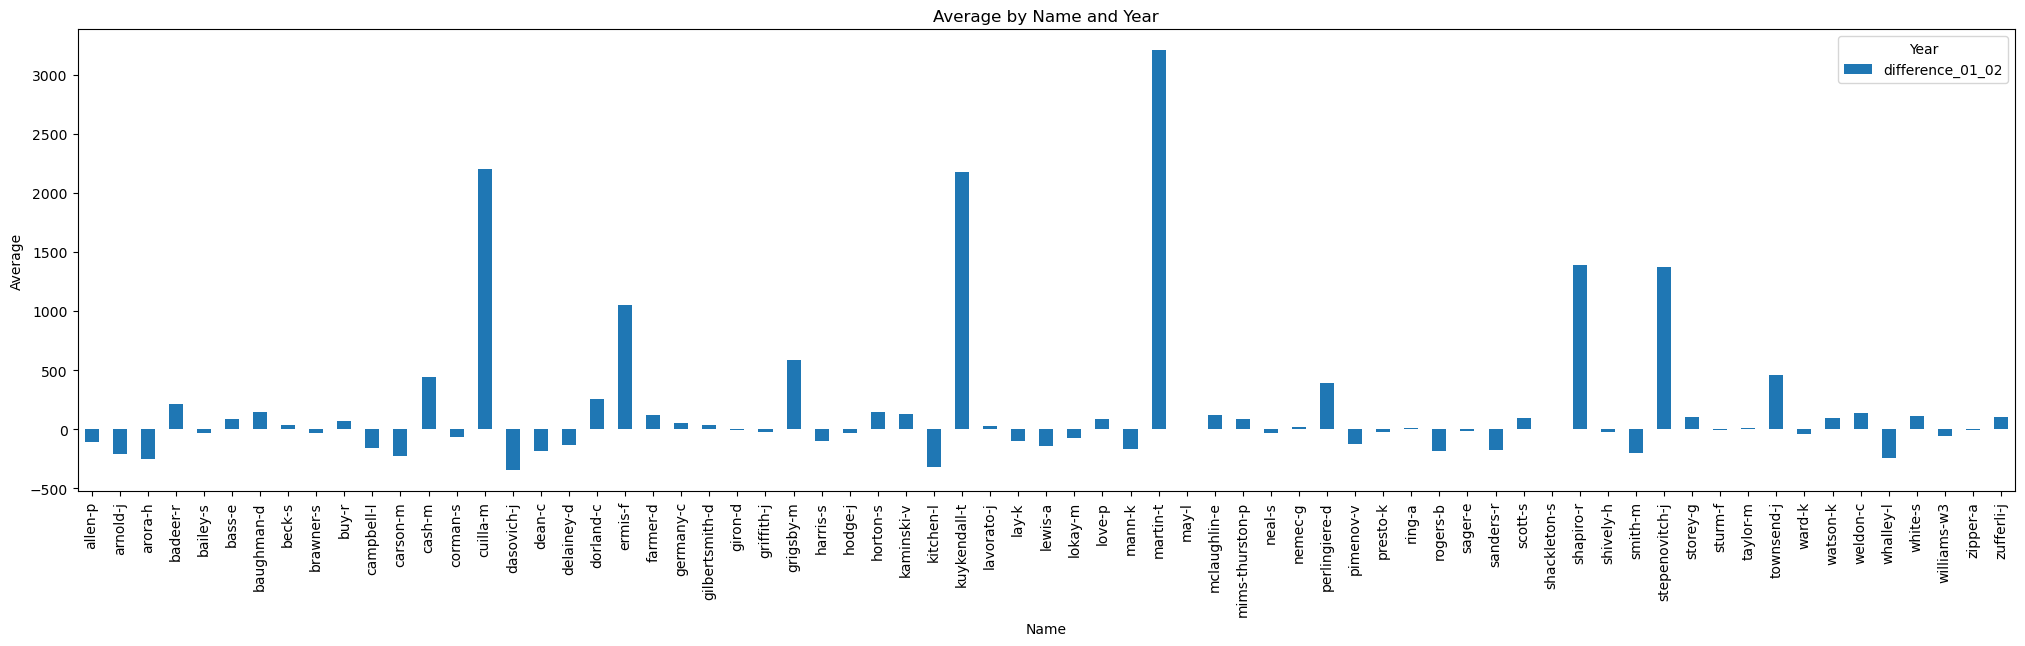

In [160]:
pivot_df['difference_01_02'].plot(kind='bar', figsize=(25, 6))
plt.xlabel('Name')
plt.ylabel('Average')
plt.title('Average by Name and Year')
plt.legend(title='Year')
plt.show()

In [161]:
count = 0
sum = 0

for number in pivot_df['difference_01_02']:
    sum += number
    count += 1
average = sum/count

print(average)

169.5072463768116


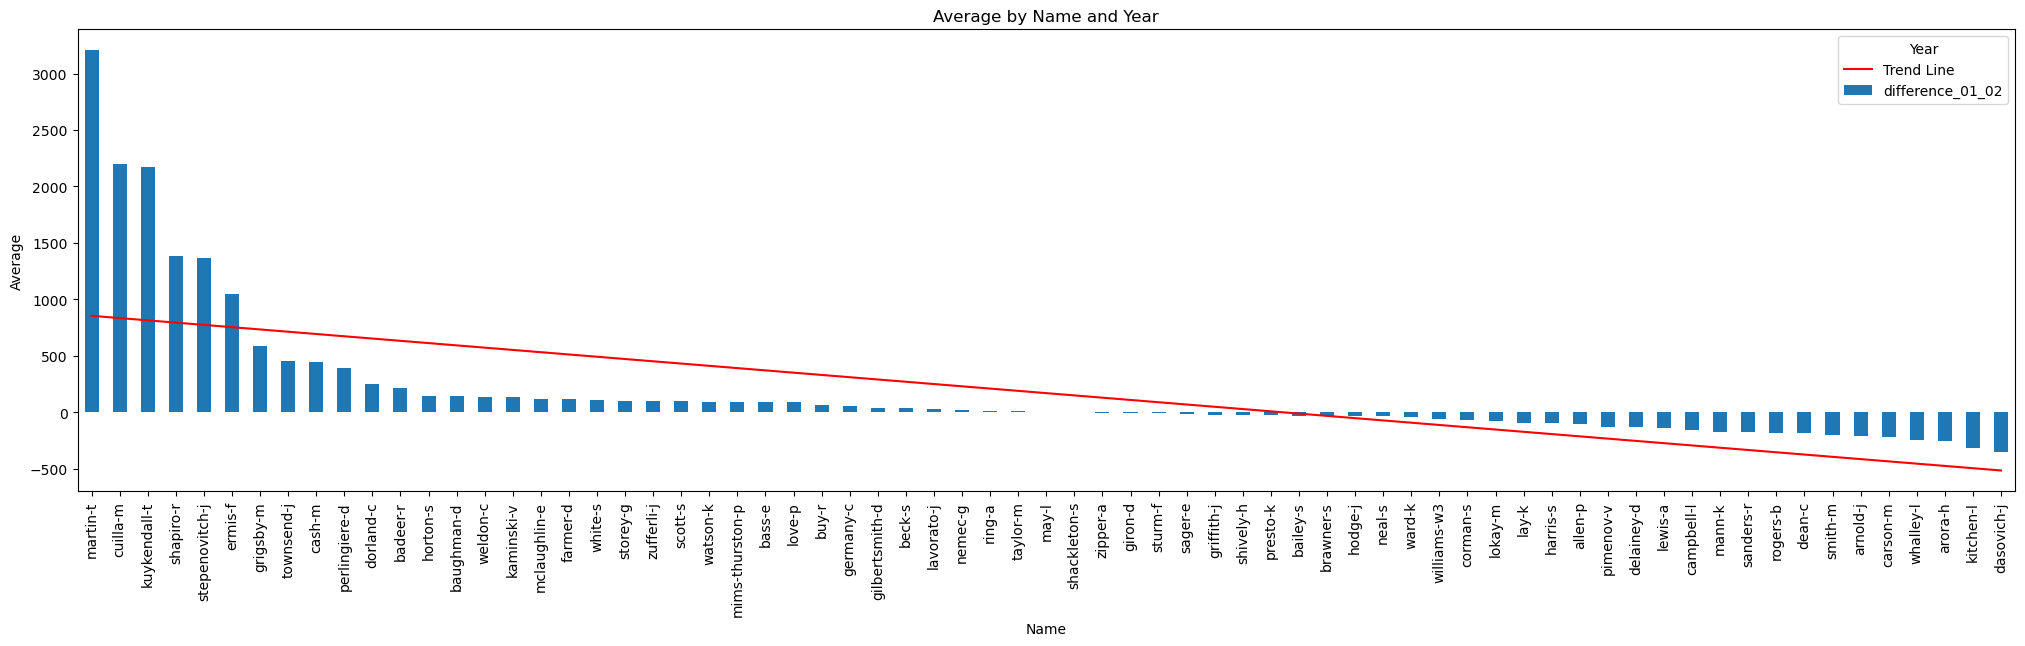

In [162]:
# Sort the DataFrame by the values in the 'difference_01_02' column
pivot_df_sorted = pivot_df.sort_values(by='difference_01_02', ascending=False)

# Plot the sorted bar chart
pivot_df_sorted['difference_01_02'].plot(kind='bar', figsize=(25, 6))

# Fit a trend line (linear regression)
x = np.arange(len(pivot_df_sorted))
y = pivot_df_sorted['difference_01_02'].values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(x, p(x), color='red', label='Trend Line')

# Add labels and title
plt.xlabel('Name')
plt.ylabel('Average')
plt.title('Average by Name and Year')

# Show the legend with a title
plt.legend(title='Year')

# Show the plot
plt.show()

## Count of emails by year

In [167]:
names_dict = []

for text_file in text_files:
    file_name = os.path.basename(text_file)
    year_name = os.path.splitext(file_name)[0].strip('word_counts_')

    name_count = {}

    with open(text_file, 'r') as file:
        lines = file.readlines()

        names_array = split_name_text(lines)

        for name in names_array:
            if name in name_count:
                name_count[name] += 1
            else:
                name_count[name] = 1

        # Split name and count before appending to names_dict
        for name, count in name_count.items():
            names_dict.append({'Year': year_name, 'Name': name, 'Count': count})

print(names_dict)

[{'Year': '2000', 'Name': 'allen-p', 'Count': 1307}, {'Year': '2000', 'Name': 'arnold-j', 'Count': 1832}, {'Year': '2000', 'Name': 'arora-h', 'Count': 62}, {'Year': '2000', 'Name': 'badeer-r', 'Count': 851}, {'Year': '2000', 'Name': 'bailey-s', 'Count': 1}, {'Year': '2000', 'Name': 'bass-e', 'Count': 5727}, {'Year': '2000', 'Name': 'baughman-d', 'Count': 176}, {'Year': '2000', 'Name': 'beck-s', 'Count': 7241}, {'Year': '2000', 'Name': 'brawner-s', 'Count': 286}, {'Year': '2000', 'Name': 'buy-r', 'Count': 442}, {'Year': '2000', 'Name': 'campbell-l', 'Count': 2336}, {'Year': '2000', 'Name': 'carson-m', 'Count': 655}, {'Year': '2000', 'Name': 'cash-m', 'Count': 1317}, {'Year': '2000', 'Name': 'corman-s', 'Count': 66}, {'Year': '2000', 'Name': 'cuilla-m', 'Count': 385}, {'Year': '2000', 'Name': 'dasovich-j', 'Count': 9301}, {'Year': '2000', 'Name': 'davis-d', 'Count': 1285}, {'Year': '2000', 'Name': 'dean-c', 'Count': 593}, {'Year': '2000', 'Name': 'delainey-d', 'Count': 2938}, {'Year': '2

In [183]:
names_dict_df = pd.DataFrame(names_dict)

print(names_dict_df)

     Year             Name  Count
0    2000          allen-p   1307
1    2000         arnold-j   1832
2    2000          arora-h     62
3    2000         badeer-r    851
4    2000         bailey-s      1
5    2000           bass-e   5727
6    2000       baughman-d    176
7    2000           beck-s   7241
8    2000        brawner-s    286
9    2000            buy-r    442
10   2000       campbell-l   2336
11   2000         carson-m    655
12   2000           cash-m   1317
13   2000         corman-s     66
14   2000         cuilla-m    385
15   2000       dasovich-j   9301
16   2000          davis-d   1285
17   2000           dean-c    593
18   2000       delainey-d   2938
19   2000        derrick-j    482
20   2000        donohoe-t    514
21   2000        dorland-c   1209
22   2000          ermis-f    506
23   2000         farmer-d   8857
24   2000         fossum-d   3630
25   2000            gay-r    900
26   2000        germany-c   8016
27   2000   gilbertsmith-d     36
28   2000     

In [184]:
names_dict_pivot = names_dict_df.pivot_table(index='Name', columns='Year', values='Count')
names_dict_pivot = names_dict_pivot.dropna()
print(names_dict_pivot)

Year                2000     2001    2002
Name                                     
allen-p           1307.0   1706.0     3.0
arnold-j          1832.0   3057.0     3.0
arora-h             62.0    582.0     7.0
badeer-r           851.0      2.0    24.0
bailey-s             1.0    127.0   350.0
bass-e            5727.0   1541.0   473.0
baughman-d         176.0   2147.0   432.0
beck-s            7241.0   4095.0   390.0
brawner-s          286.0    637.0   101.0
buy-r              442.0   1738.0   237.0
campbell-l        2336.0   3901.0     8.0
carson-m           655.0    481.0   264.0
cash-m            1317.0   1636.0     3.0
corman-s            66.0    626.0  1304.0
cuilla-m           385.0    642.0     2.0
dasovich-j        9301.0  18353.0    15.0
dean-c             593.0   1742.0    95.0
delainey-d        2938.0    616.0     6.0
dorland-c         1209.0    554.0   357.0
ermis-f            506.0    721.0     1.0
farmer-d          8857.0   3789.0    75.0
germany-c         8016.0   2161.0 

In [185]:
names_dict_pivot['difference_01_02'] = names_dict_pivot['2002'] - names_dict_pivot['2001']

print(names_dict_pivot)

Year                2000     2001    2002  difference_01_02
Name                                                       
allen-p           1307.0   1706.0     3.0           -1703.0
arnold-j          1832.0   3057.0     3.0           -3054.0
arora-h             62.0    582.0     7.0            -575.0
badeer-r           851.0      2.0    24.0              22.0
bailey-s             1.0    127.0   350.0             223.0
bass-e            5727.0   1541.0   473.0           -1068.0
baughman-d         176.0   2147.0   432.0           -1715.0
beck-s            7241.0   4095.0   390.0           -3705.0
brawner-s          286.0    637.0   101.0            -536.0
buy-r              442.0   1738.0   237.0           -1501.0
campbell-l        2336.0   3901.0     8.0           -3893.0
carson-m           655.0    481.0   264.0            -217.0
cash-m            1317.0   1636.0     3.0           -1633.0
corman-s            66.0    626.0  1304.0             678.0
cuilla-m           385.0    642.0     2.

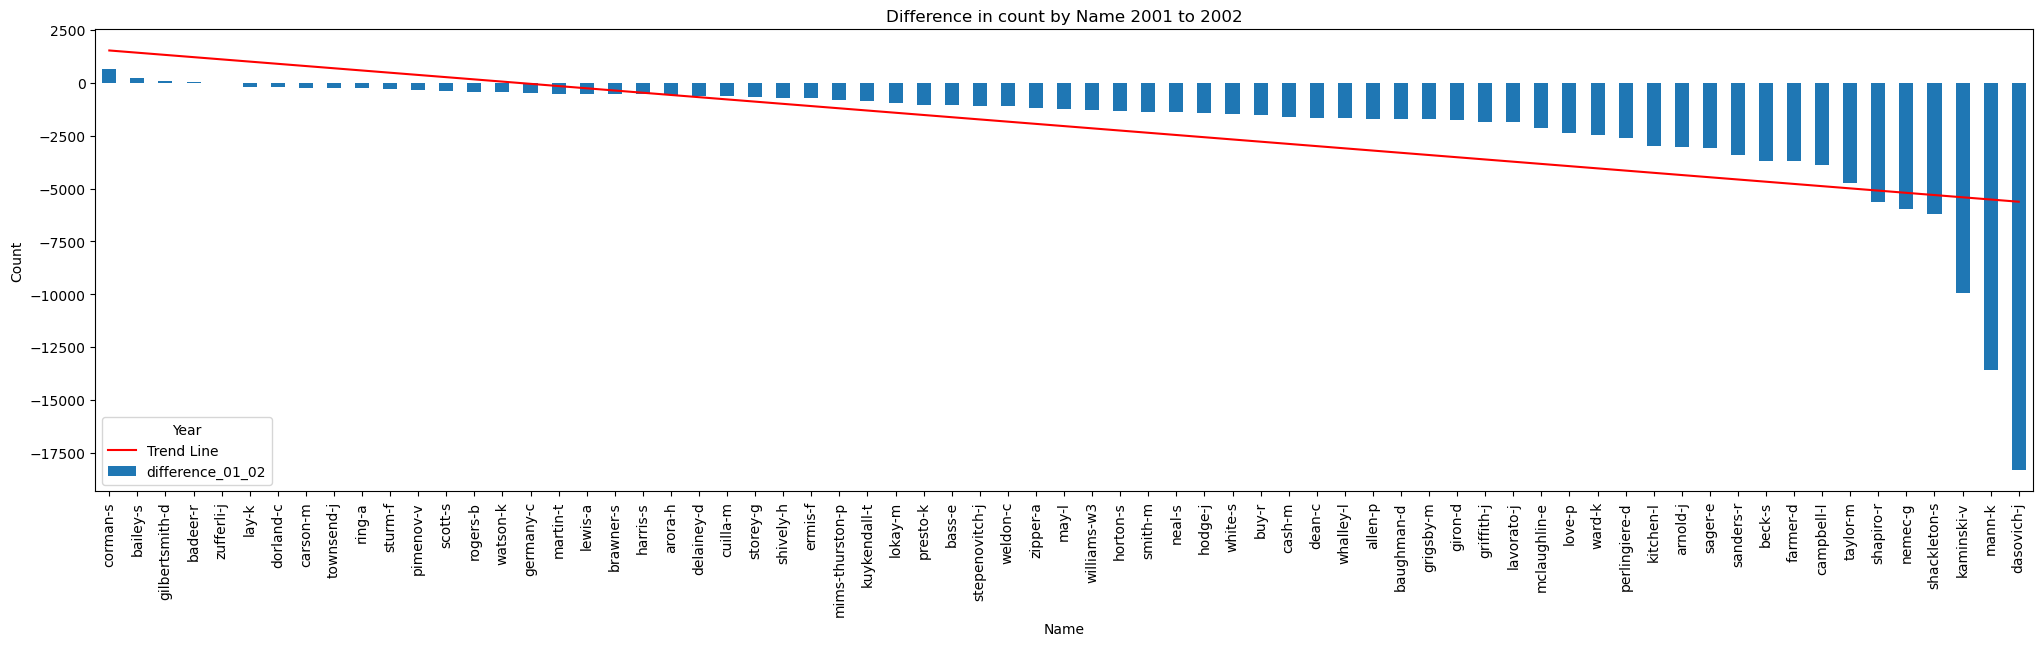

In [187]:
# Sort the DataFrame by the values in the 'difference_01_02' column
names_dict_pivot_sorted = names_dict_pivot.sort_values(by='difference_01_02', ascending=False)

# Plot the sorted bar chart
names_dict_pivot_sorted['difference_01_02'].plot(kind='bar', figsize=(25, 6))

# Fit a trend line (linear regression)
x = np.arange(len(names_dict_pivot_sorted))
y = names_dict_pivot_sorted['difference_01_02'].values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(x, p(x), color='red', label='Trend Line')

# Add labels and title
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Difference in count by Name 2001 to 2002')

# Show the legend with a title
plt.legend(title='Year')

# Show the plot
plt.show()